In [1]:
import glob
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.feature import hog

### Step 1 - Read Images

In [2]:

vehicle_image_arr=[]
vehicle_images_GTI_Far = glob.glob('./vehicles/vehicles/GTI_Far/*.png')
vehicle_images_GTI_Left = glob.glob('./vehicles/vehicles/GTI_Left/*.png')
vehicle_images_GTI_MiddleClose = glob.glob('./vehicles/vehicles/MiddleClose/*.png')
vehicle_images_GTI_Right = glob.glob('./vehicles/vehicles/GTI_Right/*.png')
vehicle_images_KITTI_extracted = glob.glob('./vehicles/vehicles/KITTI_extracted/*.png')
vehicle_image_arr = np.concatenate([vehicle_images_GTI_Far, vehicle_images_GTI_Left, vehicle_images_GTI_MiddleClose, vehicle_images_GTI_Right, vehicle_images_KITTI_extracted])

vehicle_images_original=[]
for imagePath in vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    vehicle_images_original.append(rgbImage)

print('Reading of Vehicle Images Done')

non_vehicle_image_arr=[]
non_vehicle_images_Extras = glob.glob('./non-vehicles/non-vehicles/Extras//*.png')
non_vehicle_images_GTI = glob.glob('./non-vehicles/non-vehicles/GTI/*.png')
non_vehicle_image_arr= np.concatenate([non_vehicle_images_Extras,non_vehicle_images_GTI])


non_vehicle_images_original=[]
for imagePath in non_vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    non_vehicle_images_original.append(rgbImage)

print("Reading of Non Vehicle Images Done")

print("No of Vehicle Images Loaded -"+ str(len(vehicle_image_arr)))
print("No of Non-Vehicle Images Loaded -"+ str(len(non_vehicle_images_original)))

Reading of Vehicle Images Done
Reading of Non Vehicle Images Done
No of Vehicle Images Loaded -8373
No of Non-Vehicle Images Loaded -8968


Shape of Vehicle Image(64, 64, 3)
Shape of Non Vehicle Image(64, 64, 3)


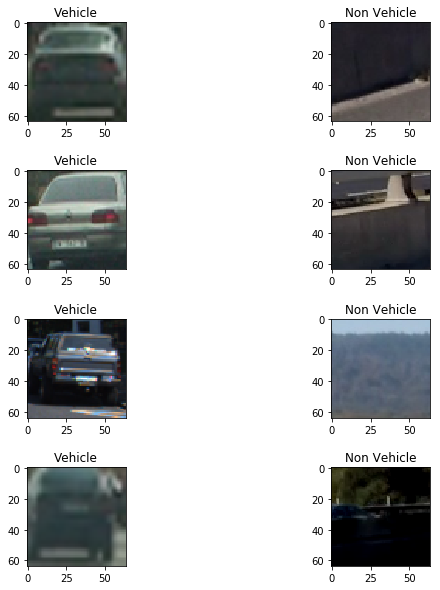

In [3]:
# Visualizing the Vehicle and Non Vehicle Images


f, axes = plt.subplots(4,2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for index in range(4):
    vehicle=random.randint(0, len(vehicle_images_original)-1)
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    axes[index,0].imshow(vehicle_images_original[vehicle])
    axes[index,0].set_title("Vehicle")
    axes[index,1].imshow(non_vehicle_images_original[non_vehicle])
    axes[index,1].set_title("Non Vehicle")
print("Shape of Vehicle Image" +  str(vehicle_images_original[vehicle].shape))
print("Shape of Non Vehicle Image" +  str(non_vehicle_images_original[non_vehicle].shape))

### Step 2- Extract Features

In [4]:
### 2.1 Experimenting with Color Spaces
### Extract Color Space

def ExtractColorHistogram(image, nbins=32, bins_range=(0,255), resize=None):
    if(resize !=None):
        image= cv2.resize(image, resize)
    zero_channel= np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    first_channel= np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    second_channel= np.histogram(image[:,:,2], bins=nbins, range=bins_range)
    return zero_channel,first_channel, second_channel

def FindBinCenter(histogram_channel):
    bin_edges = histogram_channel[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    return bin_centers

def ExtractColorFeatures(zero_channel, first_channel, second_channel):
    return np.concatenate((zero_channel[0], first_channel[0], second_channel[0]))


No of features are 384


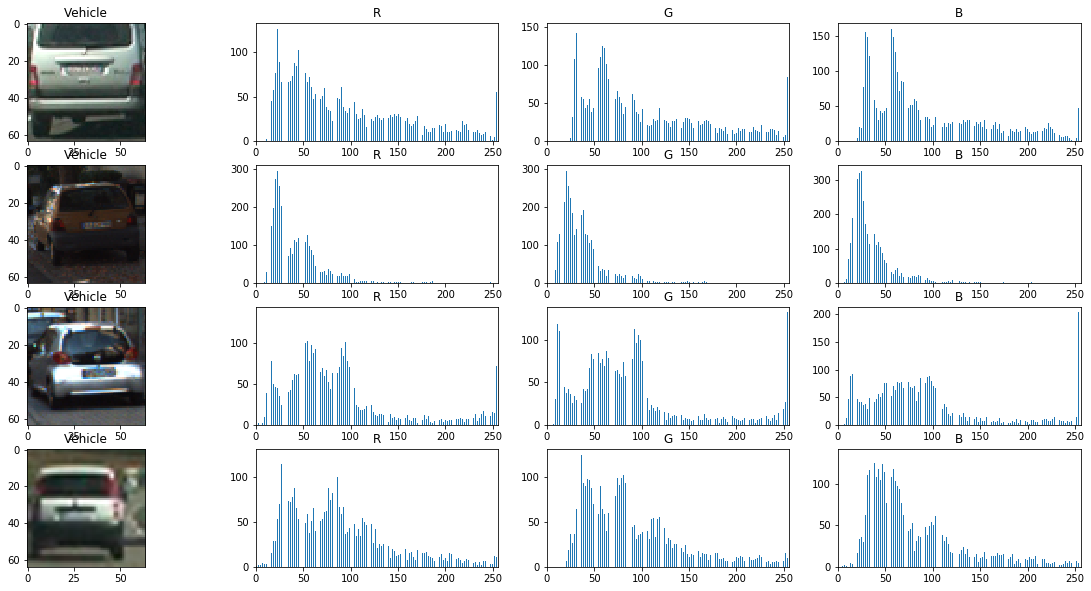

In [5]:
# Checking Color Features for Vehicles

f, axes= plt.subplots(4,4, figsize=(20,10))


for index in range(4):
    
    vehicle=random.randint(0, len(vehicle_images_original)-1)
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    
    r,g,b = ExtractColorHistogram(vehicle_images_original[vehicle],128)
   
    center= FindBinCenter(r)
    axes[index,0].imshow(vehicle_images_original[vehicle])
    axes[index,0].set_title("Vehicle")
    axes[index,1].set_xlim(0,256)
    axes[index,1].bar(center,r[0])
    axes[index,1].set_title("R")
    axes[index,2].set_xlim(0,256)
    axes[index,2].bar(center,g[0])
    axes[index,2].set_title("G")
    axes[index,3].set_xlim(0,256)
    axes[index,3].bar(center,b[0])
    axes[index,3].set_title("B")
    
features = ExtractColorFeatures(r,g,b)
print("No of features are "+ str(len(features)))
    


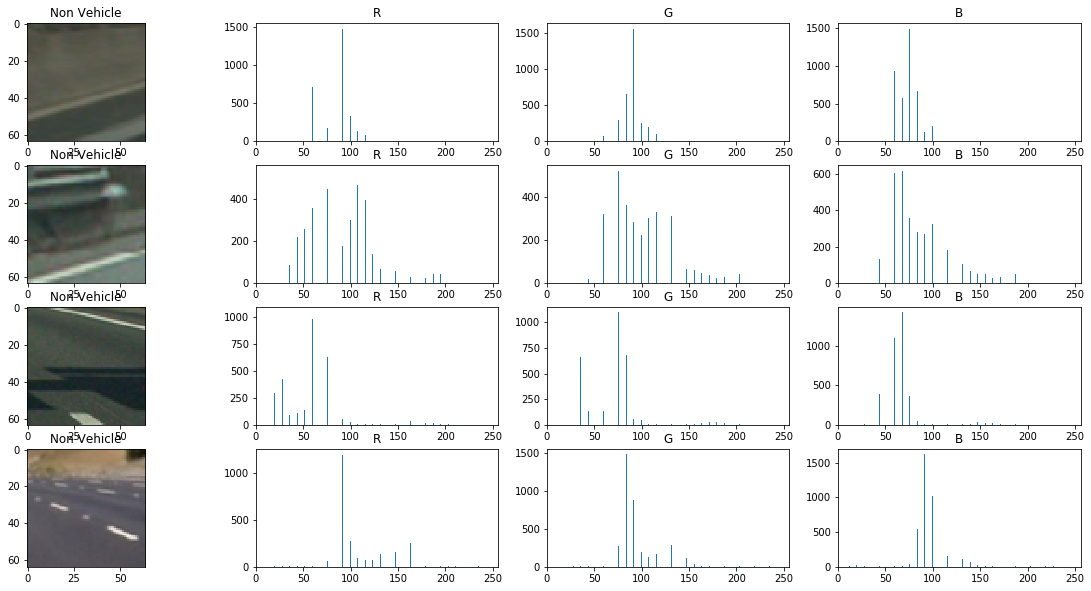

In [6]:
# Checking Color Features for Non Vehicles


f, axes= plt.subplots(4,4, figsize=(20,10))


for index in range(4):
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    
    r,g,b = ExtractColorHistogram(non_vehicle_images_original[non_vehicle])
    center= FindBinCenter(r)
    axes[index,0].imshow(non_vehicle_images_original[non_vehicle])
    axes[index,0].set_title("Non Vehicle")
    axes[index,1].set_xlim(0,256)
    axes[index,1].bar(center,r[0])
    axes[index,1].set_title("R")
    axes[index,2].set_xlim(0,256)
    axes[index,2].bar(center,g[0])
    axes[index,2].set_title("G")
    axes[index,3].set_xlim(0,256)
    axes[index,3].bar(center,b[0])
    axes[index,3].set_title("B")


### Step 3- Spatial Binning (optional)

In [7]:
def SpatialBinningFeatures(image,size):
    image= cv2.resize(image,size)
    return image.ravel()

In [8]:
featureList=SpatialBinningFeatures(vehicle_images_original[1],(16,16))
print(featureList.shape)

(768,)


### Step 4- HOG

In [9]:
def GetFeaturesFromHog(image,orient,cellsPerBlock,pixelsPerCell):
    hog_features, hog_image = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=True, feature_vector=True)
    return hog_features, hog_image

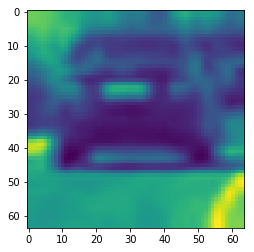

768


C:\Users\kanwal\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [10]:
image=vehicle_images_original[1]
image=image[:,:,0]
plt.imshow(image)
plt.show()
feature1,image=GetFeaturesFromHog(image,9,2,8)
print(len(featureList))

### Step 5- Generate Features Data


In [11]:
def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell):
    featureList=[]
    imageList=[]
    for image in images:
        convertedImage= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        #image=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        local_features_1, hogImage=GetFeaturesFromHog(convertedImage[:,:,0],orientation,cellsPerBlock,pixelsPerCell)
        local_features_2, hogImage2=GetFeaturesFromHog(convertedImage[:,:,1],orientation,cellsPerBlock,pixelsPerCell)
        local_features_3, hogImage3=GetFeaturesFromHog(convertedImage[:,:,2],orientation,cellsPerBlock,pixelsPerCell)
        x=np.hstack([local_features_1,local_features_2,local_features_3])
        featureList.append(x)
#         featureList.append(local_features_1)
#         featureList.append(local_features_2)
        imageList.append(hogImage)
    return featureList, imageList

In [13]:
%%time
vehicleFeatures, imageList= ExtractFeatures(vehicle_images_original,9,2,16)
nonVehicleFeatures, imageList= ExtractFeatures(non_vehicle_images_original,9,2,16)


C:\Users\kanwal\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Wall time: 4min 1s


In [14]:


featuresList= np.vstack([vehicleFeatures, nonVehicleFeatures])
print("Shape of features list is ", featuresList.shape)
labelList= np.concatenate([np.ones(len(vehicleFeatures)), np.zeros(len(nonVehicleFeatures))])
print("Shape of label list is ", labelList.shape)


Shape of features list is  (17341, 972)
Shape of label list is  (17341,)


### Step 6- Data Preprocessing

In [15]:
# train test split of data

from sklearn.model_selection import train_test_split

X_train,  X_test,Y_train, Y_test = train_test_split(featuresList, labelList, test_size=0.2, shuffle=True)



In [16]:
#normalization and scaling

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

### Step 7- Define and Train a classifier

In [109]:
"""%%time
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(X_train,Y_train)
print("Accuracy is  ", classifier.score(X_test,Y_test) )"""

Accuracy is   0.7137503603343903
Wall time: 15min 55s


In [17]:
%%time
from sklearn.svm import LinearSVC
classifier1= LinearSVC()
classifier1.fit(X_train,Y_train)
print("Accuracy is  ", classifier1.score(X_test,Y_test) )

Accuracy is   0.99106370712
Wall time: 5.2 s


### Step 8 - Sliding Window

C:\Users\kanwal\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


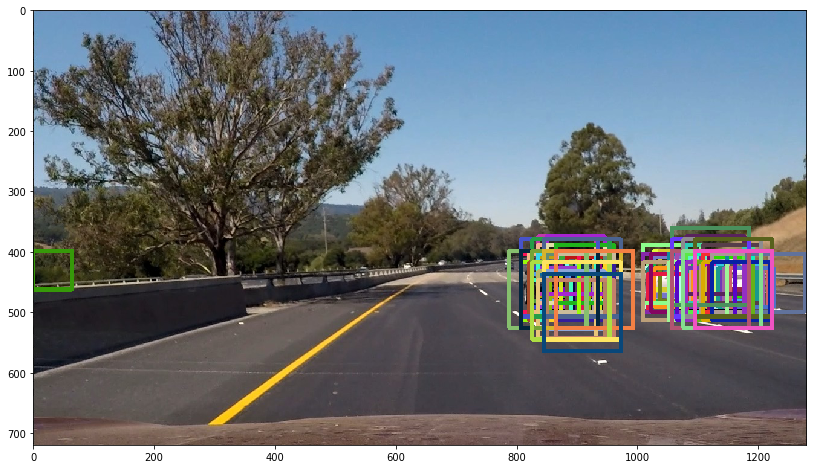

In [48]:

import matplotlib.image as mpimg

image = mpimg.imread('test6.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    
    for bbox in bboxes:
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        color=(r, g, b)
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
    # If x and/or y start/stop positions not defined, set to image size
    # Compute the span of the region to be searched    
    # Compute the number of pixels per step in x/y
    # Compute the number of windows in x/y
    # Initialize a list to append window positions to
    if x_start_stop[0] == None:
        x_start_stop[0]=0
    if x_start_stop[1] == None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0] ==  None:
        y_start_stop[0]= 0
    if y_start_stop[1] ==  None:
        y_start_stop[1]=img.shape[0]
    
    
    window_list = []
    
    image_width_x= x_start_stop[1] - x_start_stop[0]
    image_width_y= y_start_stop[1] - y_start_stop[0]
     
    windows_x = np.int( 1 + (image_width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    windows_y = np.int( 1 + (image_width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))
    
    modified_window_size= xy_window
    for i in range(0,windows_y):
        #modified_window_size = np.add(modified_window_size , 3)
        
        y_start = y_start_stop[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,windows_x):
            x_start = x_start_stop[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = x_start +  modified_window_size[0]
            y1= y_start + modified_window_size[1]
            window_list.append(((x_start,y_start),(x1,y1)))
    
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    # Return the list of windows
    return window_list

windows = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[360, 720], 
                    xy_window=(64,64), xy_overlap=(0.15, 0.15))
windows1 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[360, 720], 
                    xy_window=(96,96), xy_overlap=(0.15, 0.15))
windows2 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[360, 720], 
                    xy_window=(128,128), xy_overlap=(0.15, 0.15))

#image= image[:, : , 0]
#features, hog_image=ExtractFeatures([image], 9 , 2 , 8)

plt.show()
refinedWindows=[]
discardedPoints=[]
def DrawCars(windows):
    for window in windows:
        start= window[0]
        end= window[1]
        #print(start[0])
        #print(end[0])
        #clippedImage=image[480:544, 0:64]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        #print(clippedImage.shape)
        
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (64,64))
            
            f1, im1=ExtractFeatures([clippedImage], 9 , 2 , 16)
            #print(len(f1[0]))

            #print(clippedImage.ravel().shape)
            predictedOutput=classifier1.predict([f1[0]])
            #print(predictedOutput)
            if(predictedOutput==1):
                refinedWindows.append(window)
        else:
            discardedPoints.append(window)

DrawCars(windows)
DrawCars(windows1)
DrawCars(windows2)

window_img = draw_boxes(image, refinedWindows, color=(r, g, b), thick=6)                    


#window_img = draw_boxes(image, windows, color=(r, g, b), thick=6)                    
plt.figure(figsize=(16,8))
plt.imshow(window_img)
plt.show()

### Step 9 - Heatmap 

2


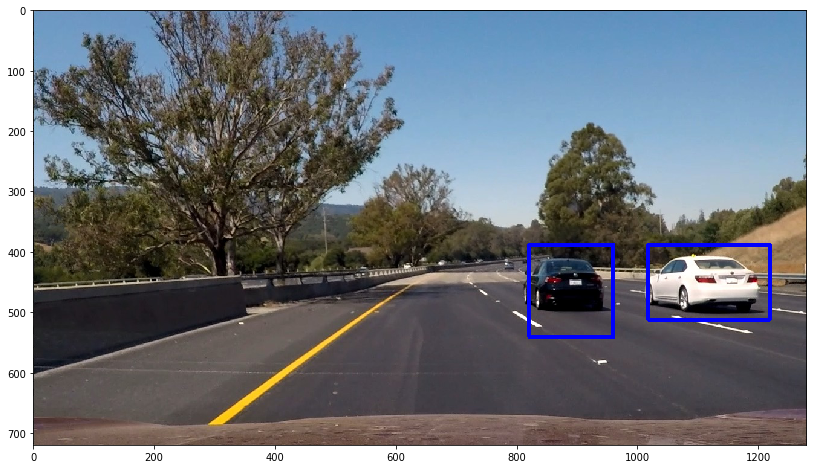

In [49]:
from scipy.ndimage.measurements import label

heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap # Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

heat = add_heat(heat,refinedWindows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,5)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(labels[1])
draw_img = draw_labeled_bboxes(np.copy(image), labels)
plt.figure(figsize=(16,8))
plt.imshow(draw_img)
plt.show()

### Step 10- Pipeline

In [ ]:
def Pipeline(image):
    